## IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## DATA PREPROCESSING

### TRAINING IMAGE PREPROCESSING

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### VALIDATION IMAGE PREPROCESSING

In [5]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[109.25  65.25  98.25]
   [106.5   62.5   95.5 ]
   [103.    59.    92.  ]
   ...
   [106.5   61.5   92.5 ]
   [113.5   68.5   99.5 ]
   [108.    63.    94.  ]]

  [[108.    67.   101.  ]
   [115.25  74.25 108.25]
   [111.25  70.25 104.25]
   ...
   [109.5   65.    98.  ]
   [100.25  55.75  88.75]
   [111.    66.5   99.5 ]]

  [[118.25  78.25 114.25]
   [ 98.75  58.75  94.75]
   [110.75  70.75 106.75]
   ...
   [108.    66.5  101.5 ]
   [103.75  62.25  97.25]
   [ 99.5   58.    93.  ]]

  ...

  [[141.75 143.75 181.75]
   [161.25 164.25 199.25]
   [160.5  163.5  196.5 ]
   ...
   [164.25 165.25 195.25]
   [152.   153.   183.  ]
   [160.25 161.25 191.25]]

  [[139.   141.   179.  ]
   [146.   149.   184.  ]
   [144.25 147.25 180.25]
   ...
   [162.25 163.25 193.25]
   [170.75 171.75 201.75]
   [158.   159.   189.  ]]

  [[149.25 151.25 189.25]
   [148.   151.   186.  ]
   [153.5  156.5  189.5 ]
   ...
   [161.   162.   192.  ]
   [151.75 152.75 182.75]
   [160.25 161.25 19

## BUILDING MODEL

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [11]:
model=Sequential()

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dense(units=750,activation='relu'))

In [31]:
model.add(Dropout(0.5))

In [33]:
model.add(Dense(units=38,activation='softmax'))

In [35]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     1,537,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 750)            │     1,125,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 750)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │        28,538 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,864,044 (14.74 MB)

 Trainable params: 3,864,044 (14.74 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 791s 719ms/step - accuracy: 0.1282 - loss: 3.2696 - val_accuracy: 0.5522 - val_loss: 1.4982
Epoch 2/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 838s 762ms/step - accuracy: 0.6020 - loss: 1.3308 - val_accuracy: 0.6673 - val_loss: 1.1519
Epoch 3/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 790s 719ms/step - accuracy: 0.7595 - loss: 0.8065 - val_accuracy: 0.8073 - val_loss: 0.6538
Epoch 4/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 766s 697ms/step - accuracy: 0.8171 - loss: 0.6321 - val_accuracy: 0.8476 - val_loss: 0.5462
Epoch 5/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 751s 684ms/step - accuracy: 0.8398 - loss: 0.5829 - val_accuracy: 0.7672 - val_loss: 0.8945
Epoch 6/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 755s 687ms/step - accuracy: 0.8426 - loss: 0.5917 - val_accuracy: 0.7416 - val_loss: 1.0861
Epoch 7/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 754s 686ms/step - accuracy: 0.8425 - loss: 0.6393 - val_accuracy: 0.8084 - val_loss: 0.8427
Epoch 8/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 766s 697ms/step - ac

## SAVING MODEL

In [134]:
model.save('trained_model.keras')

## MODEL EVALUATION

In [49]:
train_loss,train_acc=model.evaluate(training_set)

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 208s 189ms/step - accuracy: 0.8590 - loss: 0.5822


In [50]:
print(train_loss,train_acc)

0.5645074844360352 0.8638025522232056


In [51]:
valid_loss,valid_acc=model.evaluate(validation_set)

275/275 ━━━━━━━━━━━━━━━━━━━━ 51s 186ms/step - accuracy: 0.8431 - loss: 0.6679


In [52]:
print(valid_loss,valid_acc)

0.6903454661369324 0.8390052318572998


## RECORDING HISTORY IN JSON

In [58]:
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [60]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [62]:
training_history.history

{'accuracy': [0.26932215690612793,
  0.6572017669677734,
  0.7794153094291687,
  0.8245252370834351,
  0.8408848643302917,
  0.8429049253463745,
  0.8414396643638611,
  0.8328757286071777,
  0.8207838535308838,
  0.8068568110466003],
 'loss': [2.6014513969421387,
  1.1443790197372437,
  0.7430110573768616,
  0.60651034116745,
  0.5813999176025391,
  0.5957140922546387,
  0.6474575400352478,
  0.7057294249534607,
  0.7909360527992249,
  0.8843500018119812],
 'val_accuracy': [0.5522422194480896,
  0.6672547459602356,
  0.8072501420974731,
  0.8475984334945679,
  0.7672433257102966,
  0.7416344285011292,
  0.8084452748298645,
  0.8221033215522766,
  0.8168108463287354,
  0.8390052318572998],
 'val_loss': [1.4982479810714722,
  1.1519029140472412,
  0.6538477540016174,
  0.5461629033088684,
  0.8945260643959045,
  1.086105227470398,
  0.8426622152328491,
  0.9498487710952759,
  0.9519615769386292,
  0.6903453469276428]}

In [64]:
training_history.history['val_accuracy']

[0.5522422194480896,
 0.6672547459602356,
 0.8072501420974731,
 0.8475984334945679,
 0.7672433257102966,
 0.7416344285011292,
 0.8084452748298645,
 0.8221033215522766,
 0.8168108463287354,
 0.8390052318572998]

In [66]:
print("Validation set Accuracy : {} % ".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy : 83.90052318572998 % 


In [68]:
print("Training set Accuracy : {} % ".format(training_history.history['accuracy'][-1]*100))

Training set Accuracy : 80.68568110466003 % 


## ACCURACY VISUALIZATION

In [73]:
epochs=[i for i in range(1,11)]

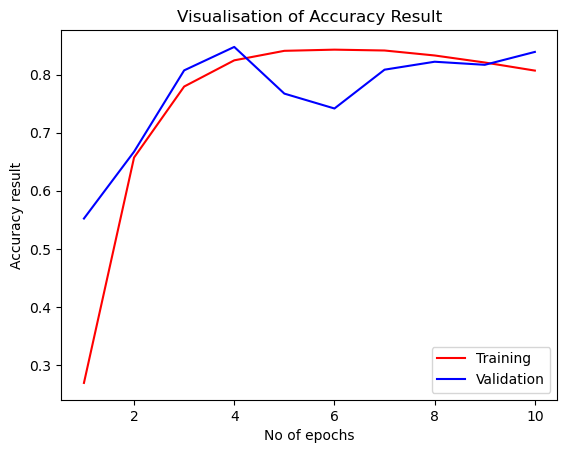

In [75]:
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation')
plt.xlabel('No of epochs')
plt.ylabel('Accuracy result')
plt.title('Visualisation of Accuracy Result')
plt.legend()

## SOME OTHER METRICS FOR MODEL EVALUATION

In [102]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(64, 64),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [106]:
y_pred=model.predict(test_set)

275/275 ━━━━━━━━━━━━━━━━━━━━ 54s 196ms/step


In [108]:
y_pred,y_pred.shape

(array([[1.0000000e+00, 1.4350109e-10, 4.7443980e-12, ..., 2.2247079e-22,
         8.6517565e-19, 5.1372326e-19],
        [9.9999988e-01, 8.0741266e-08, 6.8317086e-20, ..., 0.0000000e+00,
         2.9928736e-36, 0.0000000e+00],
        [1.0000000e+00, 6.5817895e-25, 2.3926655e-26, ..., 0.0000000e+00,
         1.3705452e-37, 2.1509805e-35],
        ...,
        [2.2929169e-18, 6.7193770e-29, 3.2463711e-19, ..., 5.0651945e-19,
         2.8680494e-20, 1.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 1.0000000e+00],
        [5.7152869e-31, 1.7801304e-38, 1.9206784e-32, ..., 5.8573731e-28,
         5.9226528e-25, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [110]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [112]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [114]:
true_categories=tf.concat([y for x,y in test_set],axis=0)

2024-11-01 16:19:41.647657: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [115]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [118]:
y_true=tf.argmax(true_categories,axis=1)

In [120]:
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [122]:
from sklearn.metrics import classification_report,confusion_matrix

In [124]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.63      0.87      0.73       504
                                 Apple___Black_rot       0.92      0.90      0.91       497
                          Apple___Cedar_apple_rust       0.96      0.78      0.86       440
                                   Apple___healthy       0.61      0.67      0.64       502
                               Blueberry___healthy       0.80      0.92      0.86       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.92      0.94       421
                 Cherry_(including_sour)___healthy       0.94      0.92      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.70      0.81       410
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.76      0.98      0.

In [126]:
conf=confusion_matrix(y_true,predicted_categories)

In [128]:
conf

array([[437,  10,   0, ...,   0,   0,   0],
       [  6, 448,   0, ...,   0,   0,   0],
       [ 12,   6, 343, ...,   2,   0,   1],
       ...,
       [  1,   0,   0, ..., 442,   3,   0],
       [  0,   0,   0, ...,   0, 427,   0],
       [  0,   0,   2, ...,   0,   0, 476]])

Text(0.5, 1.0, 'Plant Disease Prediction Confusion Matrix')

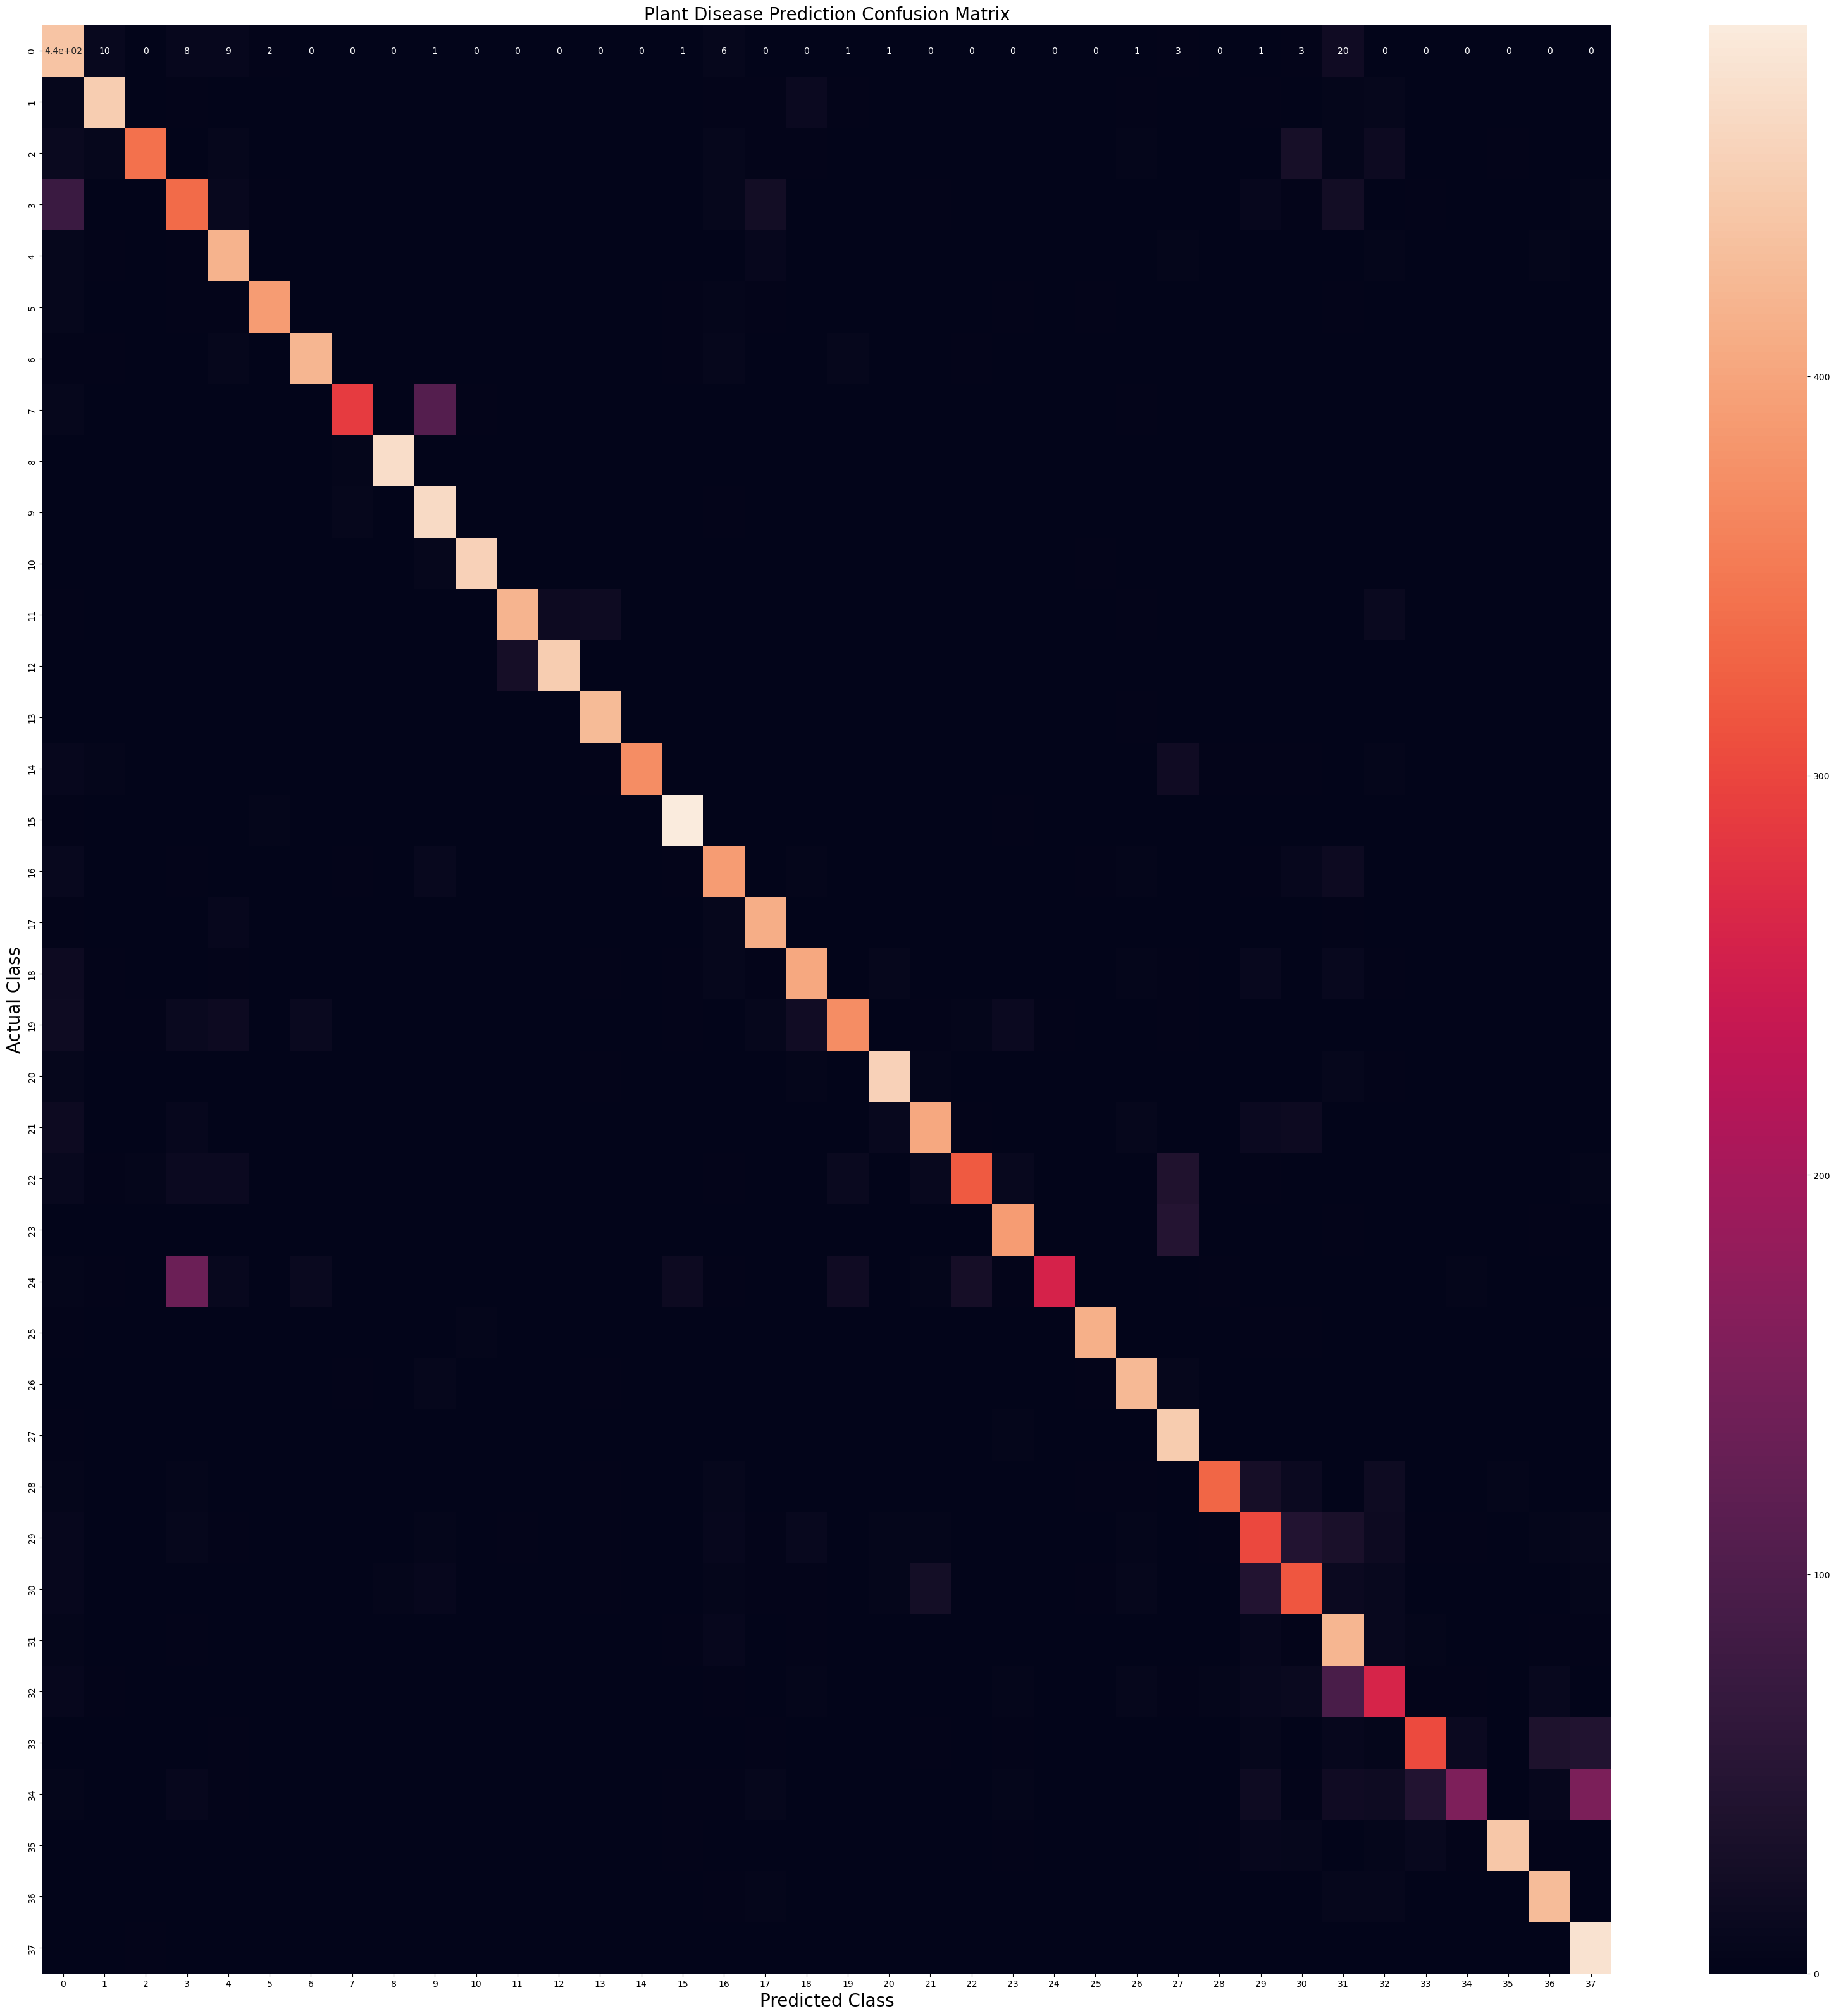

In [130]:
plt.figure(figsize=(40,40))
sns.heatmap(conf,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt. title("Plant Disease Prediction Confusion Matrix",fontsize=20)